# ROC e AUC

## Links

+ https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772

+ https://medium.com/@arthurlambletvaz/model-validation-data-science-3084bb3a4ff8

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
file_path = "../files/"

## PréProcessamento

### Base de dados de crédito

Base com registro de 2.000 cliente contendo idade, renda e empréstimo.

O desafio é: Dado essas features prever se será capaz ou não de pagar o empréstimo.

+ `clientid`: Um ID para o cliente
    - Variável Categórica Nominal
+ `income`: Salário/Renda da pessoa no formato Anual
    - Variável Numérica Contínua
+ `age`: Idade da pessoa
    - Variável Numérica Contínua ou pode ser convertida para Discreta
+ `loan`: Quantidade de empréstimo realizado
    - Variável Numérica Contínua Classe a ser Prevista
+ `default`: (classe)
    - 0: Não foi capaz de pagar o empréstimo
    - 1: Foi capas de pagar

In [5]:
base = pd.read_csv(file_path + 'credit_data.csv')
base.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [6]:
# Colocando a média
base.loc[base.age < 0, 'age'] = 40.92
    
# Dividindo as features das classes
previsores = base.iloc[:, 1:4].values
classe = base.iloc[:, 4].values

# Atribuindo a média aos valores NaN
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(previsores[:, 1:4])
previsores[:, 1:4] = imputer.transform(previsores[:, 1:4])

# Escalonamento
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

# Divisão de 75% da base para treino, e 25% para teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    previsores, classe, test_size=0.25, random_state=0)

## Curva ROC - Receiver Operating Characteristic

<img src="../../tree/imgs/roc-auc-cap/img-roc-auc-cap-01.png" width=400px>

A Curva ROC avalia o quão bom está o modelo para classificar em uma única classe.

Quanto mais próximo a curva do seu modelo da diagonal pior será o desempenho do modelo.

E quando mais curvado e distante da diagonal , melhor é o desempenho do seu modelo.

Possui dois parâmetros que são taxas \[0,1\]:



+ TPR (true Positive Rate - Taxa de Verdadeiro Positivo) também chamado de **Sensibilidade**

+ FPR (false Positve Rate - Taxa de Falso Positivo) que é calculado como `1 - ` **Especidade**

Os cálculos para encontrar esse parâmetros estão na imagem abaixo.

<img src='../../tree/imgs/roc-auc-cap/img-roc-auc-cap-02.png' width=600px>

.

<img src='../../tree/imgs/roc-auc-cap/img-roc-auc-cap-04.png' width=600px>


In [ ]:
#

## AUC (Area Under The Curve)

AUC (área debaixo da curva) ou AUCROC (Area Under the Receiver Operating Characteristics) é um valor numérico que resume a curva ROC.

AUC é o valor da integral da curva ROC. É um valor numérico entre \[0,1\].

É feito apartir do e TPR e FPR

Quanto maior o valor do AUC melhor será o modelo.

O interessante do AUC é que a métrica é invariante em escala, uma vez que trabalha com precisão das classificações ao invés de seus valores absolutos. Além disso, também mede a qualidade das previsões do modelo, independentemente do limiar de classificação.

A seguir á alguns exemplos de gráficos ROC e valores AUC para entender a correlação entre eles

<img src='../../tree/imgs/roc-auc-cap/img-roc-auc-cap-03.png' width=700px>




### Definindo os classificadores

A avaliaçâo comun dos modelso do sklearn é feita da seguinte forma

````python
classificador = Algum_Classificador()
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

# AVALIANDO
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)
````

### Testando vários Modelos de ML

In [7]:
from sklearn.metrics import accuracy_score

# Classificador NaiveBaye
from sklearn.naive_bayes import GaussianNB
model_naive_bayes = GaussianNB()
model_naive_bayes.fit(x_train, y_train)
predicts = model_naive_bayes.predict(x_test)
print("NaiveBayes", accuracy_score(y_test, predicts))

# Classificador Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier
model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(x_train, y_train)
predicts = model_decision_tree.predict(x_test)
print("DecisionTree", accuracy_score(y_test, predicts))

# Classificador Regressão Logística
from sklearn.linear_model import LogisticRegression
model_logistc_regression = LogisticRegression()
model_logistc_regression.fit(x_train, y_train)
predicts = model_logistc_regression.predict(x_test)
print("LogisticRegression", accuracy_score(y_test, predicts))

# Classificador SVM
from sklearn.svm import SVC
model_svm = SVC(kernel = 'rbf', random_state = 1, C = 2.0, probability=True)
model_svm.fit(x_train, y_train)
predicts = model_svm.predict(x_test)
print("SVM", accuracy_score(y_test, predicts))

# Classificador KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
model_knn.fit(x_train, y_train)
predicts = model_knn.predict(x_test)
print("KNN", accuracy_score(y_test, predicts))

# Classificador Floresta Randômica
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
model_random_forest.fit(x_train, y_train)
predicts = model_random_forest.predict(x_test)
print("RandomForest", accuracy_score(y_test, predicts))

# Classificador Redes Neurais Múltiplas camadas
from sklearn.neural_network import MLPClassifier
model_neural_net = MLPClassifier( max_iter = 200,
                      tol = 0.00010, solver='adam',
                      hidden_layer_sizes=(100), activation = 'relu',
                      batch_size=200, learning_rate_init=0.001, verbose = False)
model_neural_net.fit(x_train, y_train)
predicts = model_neural_net.predict(x_test)
print("MultiLayerNeuralNet", accuracy_score(y_test, predicts))

NaiveBayes 0.938
DecisionTree 0.98
LogisticRegression 0.946
SVM 0.988
KNN 0.986
RandomForest 0.984
MultiLayerNeuralNet 0.976


/home/rhavel/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [8]:
models_list = [model_naive_bayes, model_decision_tree, model_svm, model_knn, 
               model_random_forest, model_neural_net]

### Como fazer o gráfico ROC no python para um modelo

Utiliza `classifiacdor.predict_proba(x_train)`, ou seja, calcula a probabiliade da predição para a classe escolhida.

In [10]:
# Retorna a probabilidade para ambas as classes, 0 e 1
probs = model_naive_bayes.predict_proba(x_test)
print(probs[0]) # Possui váris pares de probabilidades para 0 e 1

# Vamos fazer a ROC para a classe 1
classe_roc = 1

# Filtramos somente as probabiliadde para dar classe 1
probs = probs[:, classe_roc]
probs[0]

[0.08396251 0.91603749]


0.9160374945884953

### Calculando fpr, tpr e auc

[`sklearn.metrics.roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) retorna fpr e tpr

In [12]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)
roc_auc

fpr 0.0
tpr 0.0
thresholds 1.9160374945884953


0.9685708142201835

### Criando Gráfico ROC

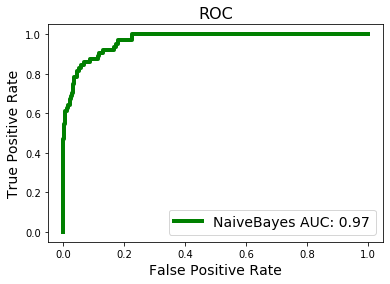

In [23]:
# Legendas Individuais de cada Modelo
label = 'NaiveBayes AUC:' + ' {0:.2f}'.format(roc_auc)
plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)

# Legendas Gerais
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.title('ROC', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 14)

### Definindo Função para plotar ROC e AUC

In [13]:
from sklearn.metrics import roc_curve, auc

def plot_roc_auc(y_test, probs, name_model="", color="g"):
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    label = name_model + ' {0:.2f}'.format(roc_auc)
    plt.plot(fpr, tpr, c = color, label = label, linewidth = 4)
    
def get_probs_to_class(model, x_test, class_to_roc = 1):
    probs = model.predict_proba(x_test)
    probs = probs[:, class_to_roc]
    return probs

def plot_legends(font=14, title_roc = 'ROC'):
    
    # random predictions curve
    plt.plot([0, 1], [0, 1], color = 'r', label = "Random " + ' {0:.2f}'.format(0.5), linestyle ='--')  
    
    # Plot information
    plt.xlabel('False Positive Rate', fontsize = font)
    plt.ylabel('True Positive Rate', fontsize = font)
    plt.title(title_roc, fontsize = font)
    plt.legend(loc = 'lower right', fontsize = font)

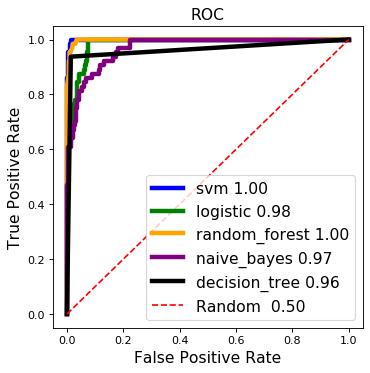

In [14]:
plt.figure(figsize=(5, 5), dpi=80)

probs = get_probs_to_class(model_svm, x_test, class_to_roc = 1)
plot_roc_auc(y_test, probs, "svm", "b")

probs = get_probs_to_class(model_logistc_regression, x_test, class_to_roc = 1)
plot_roc_auc(y_test, probs, "logistic", "g")

probs = get_probs_to_class(model_random_forest, x_test, class_to_roc = 1)
plot_roc_auc(y_test, probs, "random_forest", "orange")

probs = get_probs_to_class(model_naive_bayes, x_test, class_to_roc = 1)
plot_roc_auc(y_test, probs, "naive_bayes", "purple")

probs = get_probs_to_class(model_decision_tree, x_test, class_to_roc = 1)
plot_roc_auc(y_test, probs, "decision_tree", "black")

plot_legends()